# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('sinasc_RO_2019.csv')


df['CONSULTAS']



0        4
1        4
2        4
3        3
4        4
        ..
27023    4
27024    4
27025    4
27026    4
27027    4
Name: CONSULTAS, Length: 27028, dtype: int64

####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

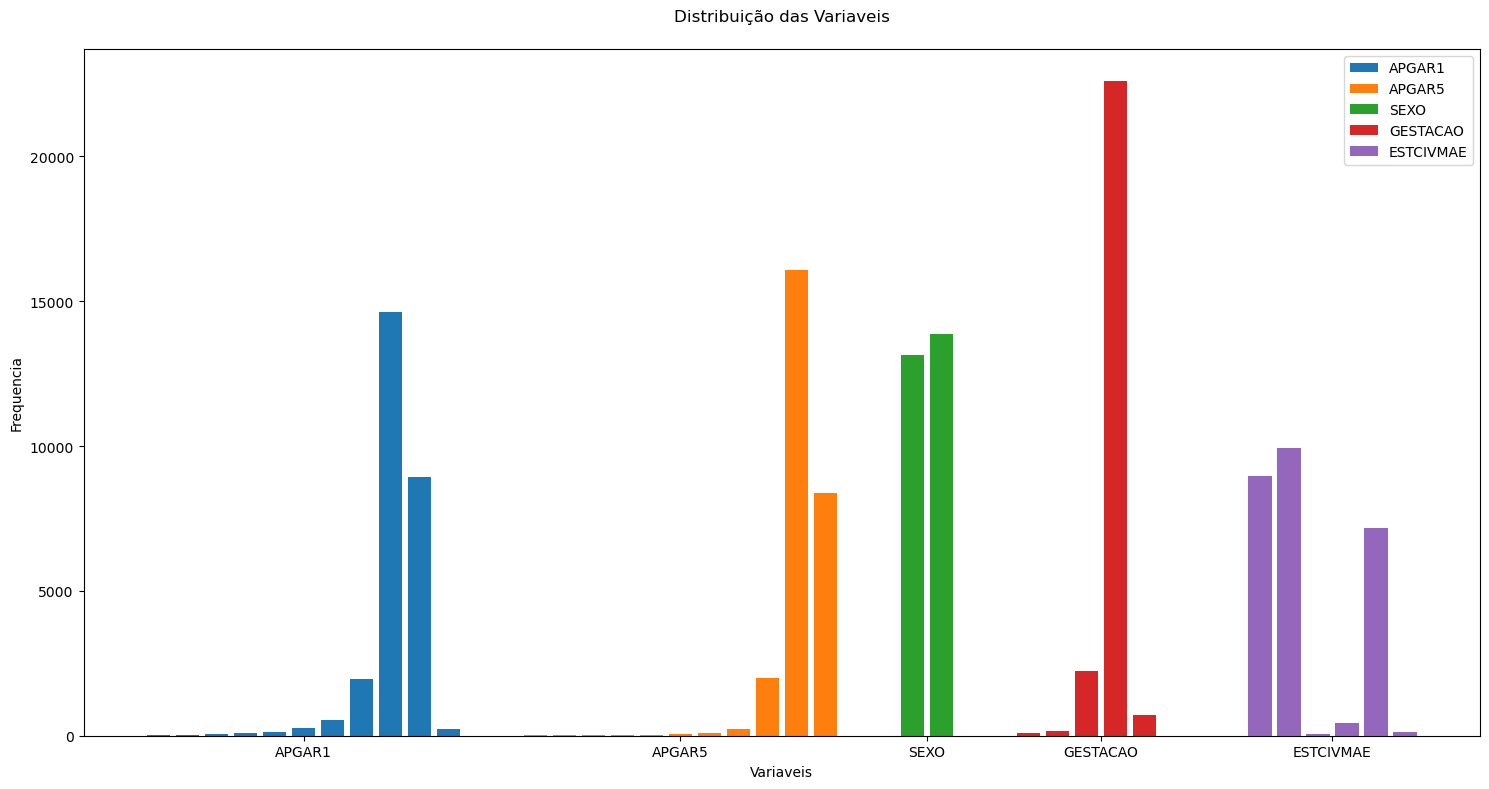

In [50]:
fig, ax = plt.subplots(figsize=(15, 8))

variaveis = ['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE']

x_pos = []
x_legenda = []
posicao = 0

for i, var in enumerate(variaveis):
    freq = df[var].value_counts().sort_index()
    x = np.arange(len(freq)) + posicao
    ax.bar(x, freq.values, label=var)
    
    x_pos.append(posicao + len(freq)/2 - 0.5)
    x_legenda.append(var)
    
    posicao += len(freq) + 2

ax.set_xticks([])
ax.set_xlabel('Variaveis')
ax.set_ylabel('Frequencia')
ax.set_title('Distribuição das Variaveis', pad=20)

plt.xticks(x_pos, x_legenda, rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

<Figure size 1200x600 with 0 Axes>

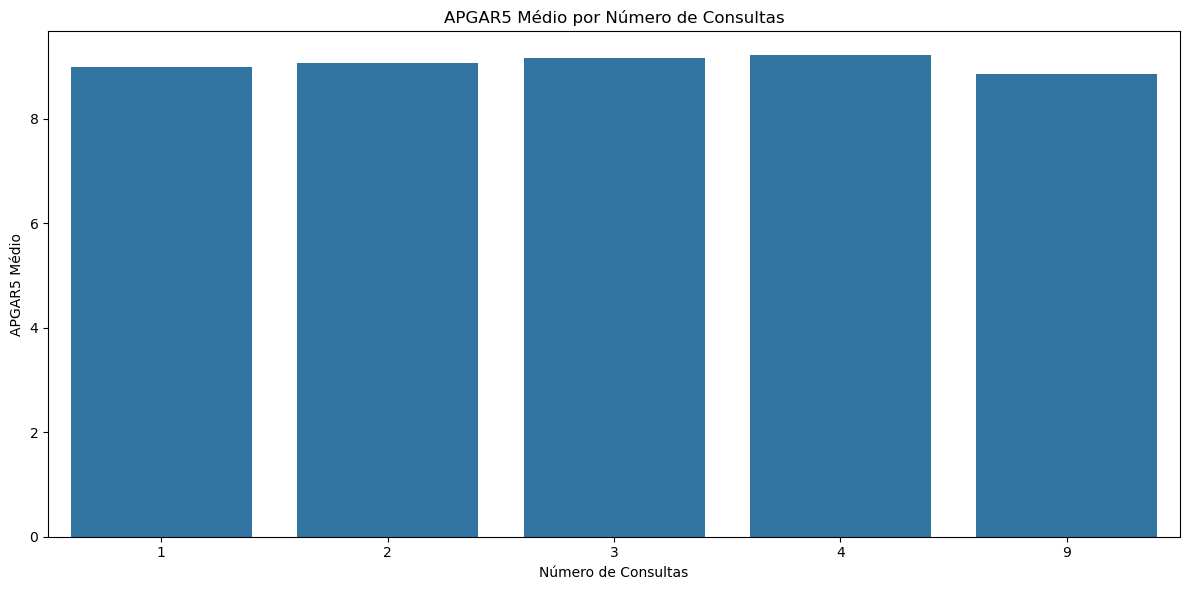

In [55]:
plt.figure(figsize=(12, 6))

media = df.groupby('CONSULTAS')['APGAR5'].mean().reset_index()

plt.figure(figsize = (12, 6))
sns.barplot(x = 'CONSULTAS', y = 'APGAR5', data = media)
plt.title('APGAR5 Médio por Número de Consultas')
plt.xlabel('Número de Consultas')
plt.ylabel('APGAR5 Médio')
plt.xticks(rotation=0)  # Rotacionar os rótulos do eixo x se necessário
plt.tight_layout()
plt.show()

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

Text(0, 0.5, 'Frequência')

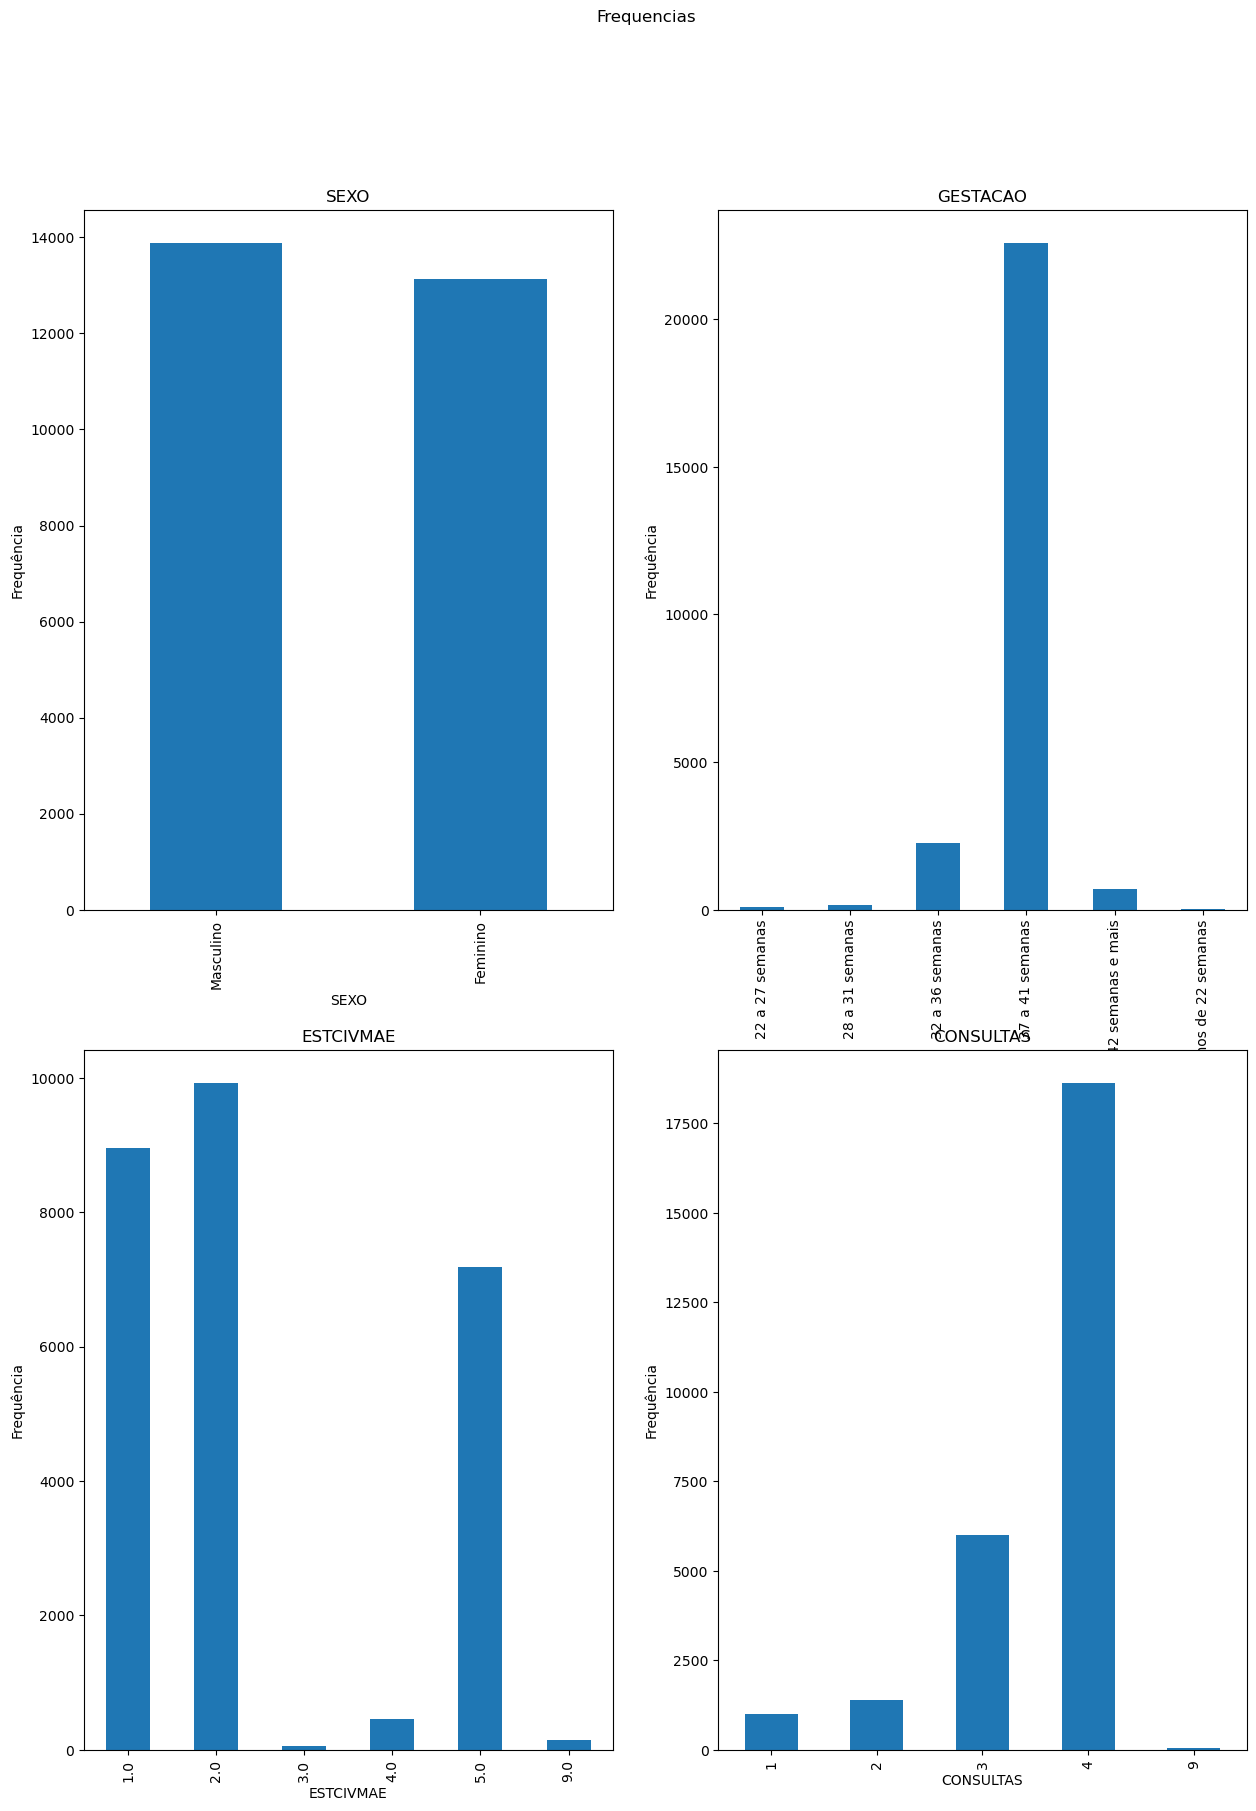

In [57]:
fig, axes = plt.subplots(2, 2, figsize=(15, 20))
fig.suptitle('Frequencias',)

df['SEXO'].value_counts().plot(kind='bar', ax=axes[0,0], title='SEXO')
axes[0,0].set_xlabel('SEXO')
axes[0,0].set_ylabel('Frequência')

df['GESTACAO'].value_counts().sort_index().plot(kind='bar', ax=axes[0,1], title='GESTACAO')
axes[0,1].set_xlabel('GESTACAO')
axes[0,1].set_ylabel('Frequência')

df['ESTCIVMAE'].value_counts().sort_index().plot(kind='bar', ax=axes[1,0], title='ESTCIVMAE')
axes[1,0].set_xlabel('ESTCIVMAE')
axes[1,0].set_ylabel('Frequência')

df['CONSULTAS'].value_counts().sort_index().plot(kind='bar', ax=axes[1,1], title='CONSULTAS')
axes[1,1].set_xlabel('CONSULTAS')
axes[1,1].set_ylabel('Frequência')